In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append('../code/python')
from mpl_settings_v3 import *


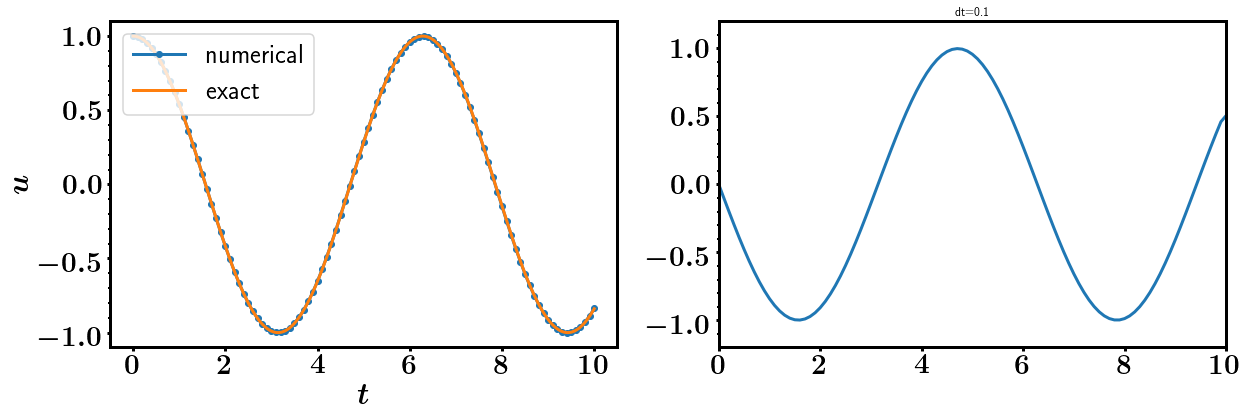

In [19]:
def solver(I, w, dt, T):
    """
    Solve u’’ + w**2*u = 0 for t in (0,T], u(0)=I and u’(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)
    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return u, t

def u_exact(t, I, w):
    return I*np.cos(w*t)

def visualize(u, t, I, w, ax):
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t, u, '-o')
    t_fine = np.linspace(0, t[-1], 1001) # very fine mesh for u_e
    u_e = u_exact(t_fine, I, w)
    ax.plot(t_fine, u_e)
    ax.legend(['numerical', 'exact'], loc='upper left')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$u$')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min(); umax = -umin
    plt.axis([t[0], t[-1], umin, umax])
    
    #plt.savefig(’tmp1.png’); plt.savefig(’tmp1.pdf’)
    

T = 10
Nt = 10
dt = 1/Nt
I = 1
w = 1

u, t = solver(I, w, dt, T)


v = np.zeros_like(u)
v[1:-1] = (u[2:] - u[:-2])/(2*dt) # central difference
v[0] = 0 # boundary condition u’(0)
v[-1] = (u[-1] - u[-2])/dt # backward difference

fig, axes = plt.subplots(figsize=(20, 6), ncols=2)
visualize(u, t, I, w, ax=axes[0])

ax = axes[1]
ax.plot(t, v)
plt.show()